In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
full_data = pd.read_csv(r"C:\Users\Edwin\Downloads\05_11_21_CdSe_Abs_Fixed") # add time so that you can pull from the same
wavelength_columns = [col for col in data.columns if "nm" in col]
wavelengths = [float(w.replace("nm", "")) for w in wavelength_columns]
full_spectra = full_data[wavelength_columns]

full_data = full_data[full_data['Sonication Time (Min)']==10]
full_data.reset_index(inplace=True, drop=True)

In [60]:
cb_0 = full_data[full_data['CdAc concentration molarity'] == 0]
blanks = cb_0[cb_0['Se concentration molarity'] == 0].copy()
samples = full_data.copy()
blanked_samples = samples.copy()
blanks

,Unnamed: 0,UID,Sonication Time (Min),Labware,Slot,Well,CdAc concentration molarity,Se concentration molarity,OleicAc concentration molarity,Oleylamine concentration molarity,...,990nm,991nm,992nm,993nm,994nm,995nm,996nm,997nm,998nm,999nm
0,81,S2_A1_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,2,A1,0.0,0.0,0.00,0.00,...,0.007,0.007,0.006,0.006,0.006,0.005,0.005,0.006,0.005,0.006
1,82,S2_A2_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,2,A2,0.0,0.0,0.00,0.25,...,0.006,0.006,0.005,0.006,0.006,0.006,0.005,0.005,0.005,0.006
2,83,S2_A3_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,2,A3,0.0,0.0,0.00,0.50,...,0.143,0.145,0.145,0.146,0.146,0.146,0.145,0.145,0.144,0.144
3,84,S2_A4_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,2,A4,0.0,0.0,0.25,0.00,...,-0.002,-0.001,-0.002,-0.001,-0.001,-0.001,-0.001,-0.002,-0.002,-0.002
4,85,S2_A5_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,2,A5,0.0,0.0,0.25,0.25,...,0.002,0.002,0.001,0.002,0.002,0.002,0.002,0.002,0.001,0.002
5,86,S2_A6_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,2,A6,0.0,0.0,0.25,0.50,...,0.003,0.004,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003
6,87,S2_B1_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,2,B1,0.0,0.0,0.50,0.00,...,0.000,0.000,-0.001,0.000,0.000,0.000,0.000,0.000,-0.001,0.000
7,88,S2_B2_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,2,B2,0.0,0.0,0.50,0.25,...,0.002,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
8,89,S2_B3_05-14-2021_CdSe,10,Fischer 24 Well Plate 7400 ÂµL,2,B3,0.0,0.0,0.50,0.50,...,-0.002,-0.001,-0.002,-0.001,-0.001,-0.001,-0.001,-0.001,-0.002,-0.001


In [61]:
ol_groups = samples.groupby('Oleylamine concentration molarity')

In [62]:
blanked_spectras_list = []
for ol, ol_group in ol_groups: # so grab one group which has this concs and blnank it with a blank th
    oa_groups= ol_group.groupby('OleicAc concentration molarity')
    for oa, oa_group in oa_groups:
        single_oa_ol_samples = oa_group
        single_oa_ol_samples_spectras = single_oa_ol_samples[wavelength_columns]
        
        blank_sample = blanks[(blanks['Oleylamine concentration molarity']==ol)&(blanks['OleicAc concentration molarity']==oa)]
        blank_spectra = blank_sample[wavelength_columns]

        blanked_spectras = single_oa_ol_samples_spectras-blank_spectra.values
        blanked_spectras_list.append(blanked_spectras)

In [63]:
pd.concat(blanked_spectras_list,axis=0)

,200nm,201nm,202nm,203nm,204nm,205nm,206nm,207nm,208nm,209nm,...,990nm,991nm,992nm,993nm,994nm,995nm,996nm,997nm,998nm,999nm
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.174,0.162,0.177,0.170,0.168,0.164,0.171,0.170,0.171,0.182,...,0.030,0.030,0.030,0.030,0.030,0.031,0.031,0.030,0.030,0.030
18,0.345,0.326,0.343,0.348,0.356,0.355,0.337,0.345,0.345,0.356,...,0.058,0.059,0.059,0.060,0.060,0.061,0.060,0.059,0.059,0.059
27,0.020,0.016,0.025,0.010,0.027,0.025,0.024,0.024,0.033,0.034,...,-0.007,-0.006,-0.006,-0.006,-0.005,-0.005,-0.005,-0.006,-0.005,-0.006
36,26.548,26.538,26.534,26.507,26.493,26.481,26.484,26.483,26.492,26.511,...,0.125,0.125,0.125,0.124,0.124,0.125,0.124,0.123,0.124,0.123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0.051,0.063,0.066,0.066,0.055,0.056,0.057,0.058,0.058,0.062,...,0.005,0.004,0.005,0.004,0.004,0.004,0.004,0.004,0.005,0.004
53,0.063,0.077,0.077,0.087,0.076,0.070,0.076,0.078,0.077,0.076,...,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.001
62,-0.067,-0.071,-0.059,-0.070,-0.074,-0.078,-0.079,-0.081,-0.080,-0.079,...,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.002,0.003,0.002
71,0.410,0.431,26.429,26.404,26.376,26.366,26.362,26.368,26.374,26.384,...,0.054,0.053,0.053,0.053,0.052,0.053,0.052,0.052,0.053,0.052


In [64]:
blanked_samples[wavelength_columns] = pd.concat(blanked_spectras_list,axis=0)

In [ ]:
blanked_samples.to_csv(r'06_17_21_ODE_SDS_Blanked_Abs', index=False)

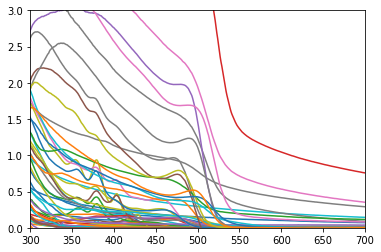

In [50]:
spectras = blanked_samples[wavelength_columns]
for i, spec in spectras[9:].iterrows():
    spec = list(spec)
    plt.plot(wavelengths, spec)
    plt.xlim([300,700])
    plt.ylim([0,3])